# Tarea 3. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (20 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2011 hasta el 31 de diciembre del 2015.

1. Mostrar el DataFrame de los precios diarios (10 puntos).
2. Graficar los precios (10 puntos).

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [41]:

def get_adj_closes(tickers, start_date=None, end_date=None):
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

In [42]:
names = ['^GSPC', 'MSFT', 'WBA', 'TSLA']
start = '2011-01-01'
end = '2015-12-31'

In [45]:
closes = get_adj_closes(tickers=names,start_date=start,end_date=end)
closes

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2011-01-03,22.558224,26.620001,32.173080,1271.869995
2011-01-04,22.646908,26.670000,32.443100,1270.199951
2011-01-05,22.574345,26.830000,32.893124,1276.560059
2011-01-06,23.235449,27.879999,32.991314,1273.849976
2011-01-07,23.058081,28.240000,32.794937,1271.500000
2011-01-10,22.751709,28.450001,33.506809,1269.750000
2011-01-11,22.663031,26.959999,33.408623,1274.479980
2011-01-12,23.017773,26.959999,33.711369,1285.959961
2011-01-13,22.727526,26.219999,34.071384,1283.760010


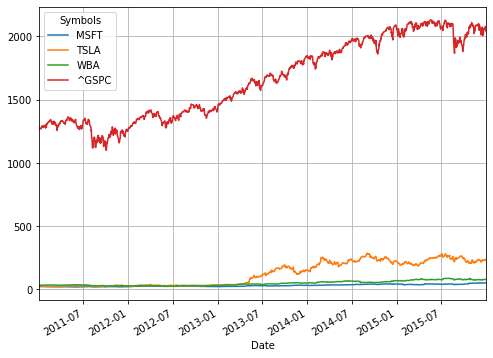

In [46]:
closes.plot(figsize=(8,6), grid=True)

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [31]:
closes


Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2011-01-03,22.558224,26.620001,32.173080,1271.869995
2011-01-04,22.646908,26.670000,32.443100,1270.199951
2011-01-05,22.574345,26.830000,32.893124,1276.560059
2011-01-06,23.235449,27.879999,32.991314,1273.849976
2011-01-07,23.058081,28.240000,32.794937,1271.500000
2011-01-10,22.751709,28.450001,33.506809,1269.750000
2011-01-11,22.663031,26.959999,33.408623,1274.479980
2011-01-12,23.017773,26.959999,33.711369,1285.959961
2011-01-13,22.727526,26.219999,34.071384,1283.760010


In [32]:
ret = ((closes - closes.shift()) / closes.shift()).dropna()
ret.head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2011-01-04,0.003931,0.001878,0.008393,-0.001313
2011-01-05,-0.003204,0.005999,0.013871,0.005007
2011-01-06,0.029286,0.039135,0.002985,-0.002123
2011-01-07,-0.007634,0.012913,-0.005952,-0.001845
2011-01-10,-0.013287,0.007436,0.021707,-0.001376


In [33]:
ret = closes.pct_change().dropna()
ret.head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2011-01-04,0.003931,0.001878,0.008393,-0.001313
2011-01-05,-0.003204,0.005999,0.013871,0.005007
2011-01-06,0.029286,0.039135,0.002985,-0.002123
2011-01-07,-0.007634,0.012913,-0.005952,-0.001845
2011-01-10,-0.013287,0.007436,0.021707,-0.001376


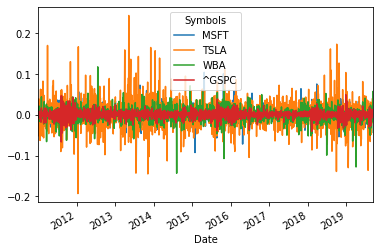

In [34]:
ret.plot()

In [50]:
help(ret.mean)

Help on method mean in module pandas.core.frame:

mean(axis=None, skipna=None, level=None, numeric_only=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return the mean of the values for the requested axis.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
        Axis for the function to be applied on.
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    **kwargs
        Additional keyword arguments to be passed to the function.
    
    Returns
    -------
    mean : Series or DataFrame (if level specified)



## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [64]:
name = ['^GSPC']
start = '2011-01-01'
end = '2015-12-31'

In [69]:
close = get_adj_closes(tickers=name,start_date=start,end_date=end)

In [68]:
ret500 = ((close - close.shift()) / close.shift()).dropna()
ret500.mean()

Symbols
^GSPC    0.000425
dtype: float64

In [54]:
ret.mean()

Symbols
MSFT     0.000932
TSLA     0.001509
WBA      0.000375
^GSPC    0.000436
dtype: float64

In [70]:
ret500.std()

Symbols
^GSPC    0.009738
dtype: float64

In [55]:
ret.std()

Symbols
MSFT     0.014515
TSLA     0.031505
WBA      0.015763
^GSPC    0.009142
dtype: float64

In [72]:
annual_ret_summary = pd.DataFrame(data={'Mean':252*ret.mean(),'Volatility':np.sqrt(252)*ret.std()},index=ret.columns)
annual_ret_summary

,Mean,Volatility
Symbols,,
MSFT,0.234892,0.230420
TSLA,0.380237,0.500124
WBA,0.094522,0.250234
^GSPC,0.109818,0.145120


In [78]:
ret500_summary = pd.DataFrame(data={'Mean':ret500.mean(),'Volatility':ret500.std()},index=ret.columns)
ret500_summary

,Mean,Volatility
Symbols,,
MSFT,NaN,NaN
TSLA,NaN,NaN
WBA,NaN,NaN
^GSPC,0.000425,0.009738


## 4. Gráfico rendimientos esperados vs. volatilidad (30 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (10 puntos).

*Nota:* el ajuste de la línea recta corresponde a una regresión lineal. Si no saben como hacerlo, por favor preguntar en asesoría.

In [81]:

import scipy.optimize as opt


In [82]:
def obj_fun(beta, Er, sigma):
    return((Er-(beta[0]+beta[1]*sigma))**2).sum()
beta_0 = [0, 1]

In [83]:
solution = opt.minimize(obj_fun, beta_0, args=(y_points, x_points))

In [84]:
beta = solution.x
beta

array([-0.00918309,  0.76046055])

In [85]:
y_points = y_points[np.argsort(x_points)]
x_points = np.sort(x_points)

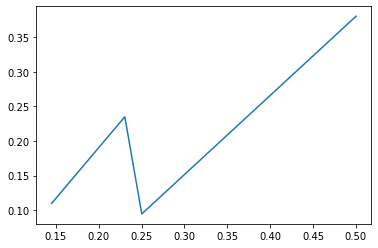

In [86]:
plt.plot(x_points, y_points)

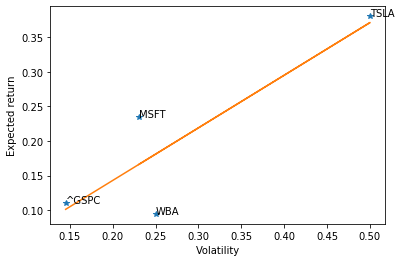

In [89]:
x_points = annual_ret_summary['Volatility']
y_points = annual_ret_summary['Mean']
plt.figure()
plt.plot(x_points, y_points, '*')
plt.xlabel('Volatility')
plt.ylabel('Expected return')
plt.text(annual_ret_summary.loc['^GSPC','Volatility'],annual_ret_summary.loc['^GSPC','Mean'],'^GSPC')
plt.text(annual_ret_summary.loc['MSFT','Volatility'],annual_ret_summary.loc['MSFT','Mean'],'MSFT')
plt.text(annual_ret_summary.loc['TSLA','Volatility'],annual_ret_summary.loc['TSLA','Mean'],'TSLA')
plt.text(annual_ret_summary.loc['WBA','Volatility'],annual_ret_summary.loc['WBA','Mean'],'WBA')
plt.plot(x_points, beta[0] + beta[1] * x_points)


La relacion entre el rendimiento y el riesgo van de la mano, para tener un mayor rendimiento tienes que asumir mayor riesgo, y viceversa, si no quieres asumir mucho riesgo, no esperes que tu rendimiento sea muy alto.
Y tambien la relacion entre el rendimiento y el riesgo es positiva.
como tenemos 4 activos, con diferentes rendimientos y diferentes riesgos, si los metemos estos 4 activos en un portafolio, el riesgo se diversifica, y el rendimiento esperado es mayor sin aumentar el riesgo.
Todo esto se puede apreciar en la grafica, conforme nuestro riesgo aumenta, tambien nuestro rendimiento esperado.
como observamos en la primera grafica da un salto donde la volatilidad es mayor al rendimiento, es por esto que hacemos el ajuste de la linea ajustada, para que la volatilidad y el rendimiento sea constante.





<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>